# Imports

In [206]:
# importing packages
import pandas as pd
import glob
import numpy as np
import scipy as sp
from scipy.stats import kurtosis, skew
# Importing matplotlib to plot the graphs.
import matplotlib.pyplot as plt



# File formatting
Gathers the files in the folder to a dataframe, to then save it to a csv.

In [207]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/Test3-10Archivos'
file_list_10 = glob.glob(folder_path + "/*")
main_dataframe = pd.DataFrame(pd.read_table(file_list_10[0], header = None))

for i in range(1,len(file_list_10)):
	data = pd.read_table(file_list_10[i], header = None)
	df = pd.DataFrame(data)
	main_dataframe = pd.concat([main_dataframe, df] )#, axis = 1)

filenames = []
for path in file_list_10:
  filenames.append(path.split("/")[-1])

print(main_dataframe)

           0      1      2      3
0      0.034  0.264  0.039 -0.046
1      0.103  0.083 -0.061 -0.012
2      0.095 -0.039 -0.007  0.039
3      0.000  0.110  0.022 -0.002
4      0.005  0.154 -0.127 -0.020
...      ...    ...    ...    ...
20475 -0.225 -0.137  0.051 -0.120
20476  0.005  0.142  0.007 -0.134
20477  0.095  0.159  0.073  0.110
20478  0.068 -0.125  0.015  0.200
20479 -0.012 -0.125 -0.076  0.049

[204800 rows x 4 columns]


In [208]:
file_list_10[0].split("/")[-1]

'2004.03.04.09.27.46'

In [209]:
filenames

['2004.03.04.09.27.46',
 '2004.03.04.09.32.46',
 '2004.03.04.09.42.46',
 '2004.03.04.10.42.46',
 '2004.03.04.10.22.46',
 '2004.03.04.10.02.46',
 '2004.03.04.10.12.46',
 '2004.03.04.09.52.46',
 '2004.03.04.10.32.46',
 '2004.03.04.10.52.46']

In [210]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/Test3-5Final'
file_list = glob.glob(folder_path + "/*")
last_df = pd.DataFrame(pd.read_table(file_list[0], header = None))

for i in range(1,len(file_list)):
	data = pd.read_table(file_list[i], header = None)
	df = pd.DataFrame(data)
	last_df = pd.concat([last_df, df] )#, axis = 1)

print(last_df)

           0      1      2      3
0      0.002  0.002  0.002  0.002
1      0.002  0.002  0.002  0.002
2      0.002  0.002  0.005  0.002
3      0.000  0.002  0.002  0.002
4      0.000  0.002  0.005  0.002
...      ...    ...    ...    ...
20475 -0.051 -0.024 -0.088  0.095
20476 -0.059 -0.457  0.159  0.110
20477 -0.024 -0.286  0.042  0.134
20478  0.142  0.154 -0.129  0.005
20479 -0.012  0.059 -0.703 -0.195

[102400 rows x 4 columns]


In [211]:
main_dataframe

,0,1,2,3
0,0.034,0.264,0.039,-0.046
1,0.103,0.083,-0.061,-0.012
2,0.095,-0.039,-0.007,0.039
3,0.000,0.110,0.022,-0.002
4,0.005,0.154,-0.127,-0.020
...,...,...,...,...
20475,-0.225,-0.137,0.051,-0.120
20476,0.005,0.142,0.007,-0.134
20477,0.095,0.159,0.073,0.110
20478,0.068,-0.125,0.015,0.200


In [212]:
# main_dataframe.to_csv("/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/10Archivos.csv")

Reads the files in the directory given in the path argument.
Returns a dataframe with all the info and a list with the filenames

Notice that several rows have the same index. At first seems odd, but could be useful

In [213]:
def readFiles(folderpath):
  folder_path = folderpath
  file_list = glob.glob(folder_path + "/*")
  res_dataframe = pd.DataFrame(pd.read_table(file_list[0], header = None))

  for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], header = None)
    df = pd.DataFrame(data)
    res_dataframe = pd.concat([res_dataframe, df] )#, axis = 1)

  names = []
  for path in file_list:
    names.append(path.split("/")[-1])

  return res_dataframe, names

In [214]:
res_df, fnames = readFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/5archivosfinal')

In [215]:
res_df.loc[20470]

,0,1,2,3,4,5,6,7
20470,-0.012,-0.085,-0.049,-0.085,0.105,-0.779,-0.273,-0.239
20470,-0.015,-0.010,0.159,-0.078,-0.042,-0.049,-0.176,-0.105
20470,-0.105,0.098,-0.061,-0.137,0.100,0.115,-0.039,-0.085
20470,-0.144,0.000,-0.117,0.005,-0.344,-0.161,-0.078,-0.251
20470,-0.068,-0.098,-0.374,-0.071,0.164,-0.249,-0.273,-0.349


# Generic graphs
Over the first 1000 and last 1000 records, to compare initial healthy state with the end of the experiment


In [216]:
channel = 4
bearing = 4
test_number = 3

### Computations

In [217]:
channel_base0= channel-1

In [218]:
file1 = pd.DataFrame(pd.read_table(file_list[0], header = None))

In [219]:
file1

,0,1,2,3
0,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002
2,0.002,0.002,0.005,0.002
3,0.000,0.002,0.002,0.002
4,0.000,0.002,0.005,0.002
...,...,...,...,...
20475,0.000,0.002,0.005,0.000
20476,0.000,0.002,0.002,0.000
20477,0.000,0.002,0.005,0.000
20478,0.002,0.002,0.002,0.002


In [220]:
x = df.index.to_series()

y = df[channel_base0]


In [221]:
print(x)

0            0
1            1
2            2
3            3
4            4
         ...  
20475    20475
20476    20476
20477    20477
20478    20478
20479    20479
Length: 20480, dtype: int64


In [222]:
X = x[0:1000]
Y = y[0:1000]

In [223]:
Y

0     -0.391
1     -0.491
2     -0.105
3      0.317
4      0.278
       ...  
995    0.115
996    0.115
997    0.024
998   -0.029
999   -0.073
Name: 3, Length: 1000, dtype: float64

In [224]:
X2 = x[-1000:]
Y2 = last_df[channel_base0][-1000:]

### Result

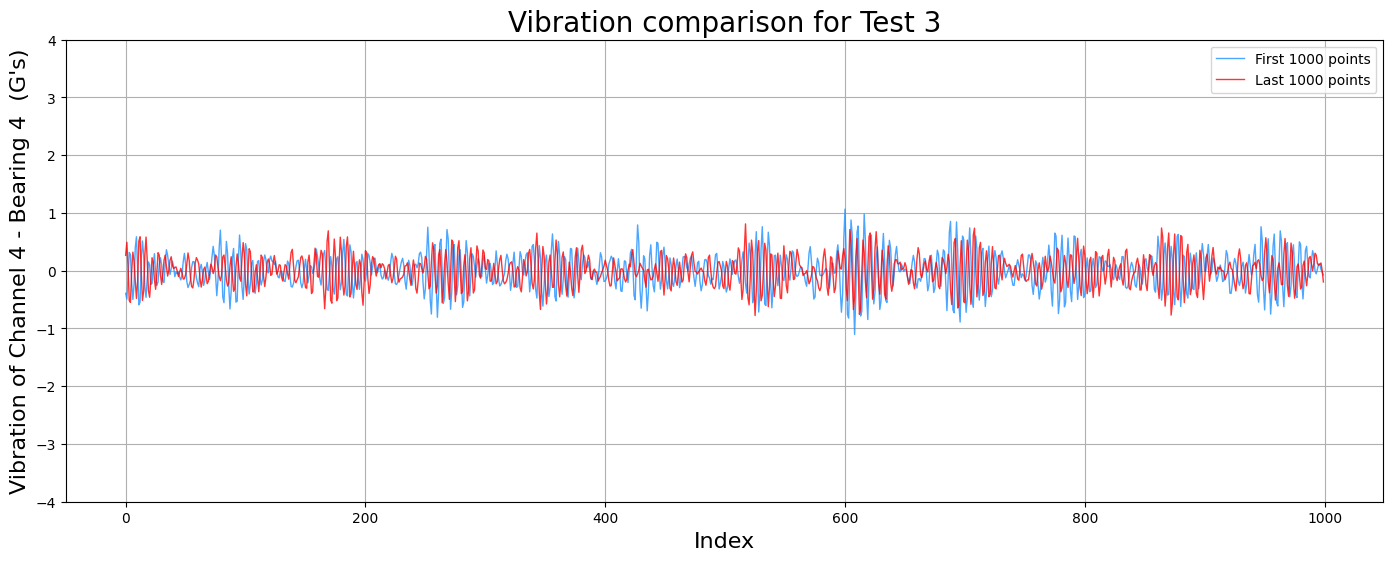

In [225]:
plt.figure(figsize=(17,6))

plt.plot(X, Y, 'dodgerblue', label = 'First 1000 points', linewidth = 1, alpha=0.8)

plt.plot(X, Y2, 'red', label = 'Last 1000 points', linewidth = 1, alpha=0.8)

# X-axis label.
plt.xlabel('Index', fontsize = 16)

# Y-axis label.
plt.ylabel(f'Vibration of Channel {channel} - Bearing {bearing}  (G\'s)', fontsize = 16)

# Title
plt.title(f"Vibration comparison for Test {test_number}", fontsize = 20)

plt.ylim(-4, 4)


# Grid
plt.grid(True)
# plt.grid(False)

# Legend for the plot.
plt.legend()

# Saving the figure on disk.
#plt.savefig('Line_plot.png')

# Displays the plot.
plt.show()

# Characteristics

## For one file

In [ ]:
file1

,0,1,2,3,4,5,6,7
0,-0.071,-0.117,-0.295,-0.471,0.132,-0.144,-0.173,-0.020
1,-0.066,-0.068,-0.063,-0.417,-0.271,-0.107,-0.078,-0.081
2,-0.078,-0.154,-0.193,-0.122,-0.254,-0.154,0.034,-0.107
3,-0.146,-0.222,-0.320,0.037,0.205,-0.349,0.090,-0.093
4,-0.083,-0.330,-0.088,-0.176,-0.417,0.103,-0.061,-0.190
...,...,...,...,...,...,...,...,...
20475,-0.168,-0.068,-0.449,0.190,0.117,1.196,-0.037,-0.122
20476,-0.112,0.088,-0.493,0.266,-0.266,0.342,-0.339,-0.164
20477,-0.081,-0.020,-0.325,-0.049,-0.112,-0.481,-0.300,-0.007
20478,-0.115,-0.146,-0.190,-0.427,0.813,0.049,-0.205,0.105


In [ ]:
file1.iloc[:, 0].mean()

-0.117158154296875

In [ ]:
def rms(array):
  return np.sqrt(np.mean(array**2))

### Function to compute characteristics, only for this set of files and dataset.

In [ ]:
def computeFunction(df, function):
  print("Function applied:", function)
  result = []
  for i in range(0,8):
    #print("Channel", i)
    data = function(df.iloc[:, i])
    #print(data)
    result.append(data)
  return result




### Computes a ton of functions and returns the result all nicely wrapped up

In [ ]:
def computeFunctionsDepracated(df):
  functions = [np.mean, np.std, kurtosis, skew, rms, max, min]
  result = pd.DataFrame(columns = [0, 1, 2, 3, 4, 5, 6, 7],
                      index = [f.__name__ for f in functions])

  for f in functions:
    # Yes, I am completly aware that this is not very efficient
    row = computeFunction(df, f)
    print(row)
    print(f.__name__)
    result = result.append(row)


In [ ]:
np.mean.__name__

'mean'

In [ ]:
functions = [np.mean, np.std, kurtosis, skew, rms, max, min]
result = pd.DataFrame(columns = [0, 1, 2, 3, 4, 5, 6, 7],
                      index = [f.__name__ for f in functions])
print(result)

            0    1    2    3    4    5    6    7
mean      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
std       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
kurtosis  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
skew      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
rms       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
max       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
min       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN


### Function to compute a ton of functions
(but this time, it will work)

In [ ]:
def computeFunctions(df, filename = "Archivo 1"):
  index = []
  for i in range(0,df.shape[1]):
    index.append("{}: CH{}".format(filename,i))

  functions = [np.mean, np.std, kurtosis, skew, rms, max, min]
  columns = [f.__name__ for f in functions]

  result = pd.DataFrame(columns = columns,
                      index = index)

  for i in range(0,df.shape[1]):
    for f in functions:
      data = f(df.iloc[:,i])
      result.loc["{}: CH{}".format(filename,i),f.__name__] = data

  return result

In [ ]:
computeFunctions(file1, filenames[0])

,mean,std,kurtosis,skew,rms,max,min
2003.10.22.12.06.24: CH0,-0.117158,0.128892,0.557575,-0.040126,0.174181,0.63,-0.808
2003.10.22.12.06.24: CH1,-0.11681,0.10638,0.571086,0.065542,0.157991,0.518,-0.632
2003.10.22.12.06.24: CH2,-0.117671,0.176177,0.270289,0.071844,0.21186,0.715,-0.806
2003.10.22.12.06.24: CH3,-0.11721,0.164022,0.367768,-0.011991,0.201597,0.503,-0.754
2003.10.22.12.06.24: CH4,0.129027,0.579418,5.902675,0.067194,0.59361,4.998,-5.0
2003.10.22.12.06.24: CH5,-0.115777,0.482299,4.265731,0.026523,0.496001,3.516,-3.833
2003.10.22.12.06.24: CH6,-0.115535,0.197923,0.626049,-0.018384,0.229176,0.764,-1.03
2003.10.22.12.06.24: CH7,-0.114618,0.175876,0.584465,0.051768,0.209928,0.796,-0.889


In [ ]:
id = []
for i in range(0,8):
  id.append("Archivo 1: CH{}".format(i))
id

['Archivo 1: CH0',
 'Archivo 1: CH1',
 'Archivo 1: CH2',
 'Archivo 1: CH3',
 'Archivo 1: CH4',
 'Archivo 1: CH5',
 'Archivo 1: CH6',
 'Archivo 1: CH7']

### Tests

In [ ]:
result = computeFunctions(file1);


In [ ]:
print(result)

                    mean       std  kurtosis      skew       rms    max    min
Archivo 1: CH0 -0.117158  0.128892  0.557575 -0.040126  0.174181   0.63 -0.808
Archivo 1: CH1  -0.11681   0.10638  0.571086  0.065542  0.157991  0.518 -0.632
Archivo 1: CH2 -0.117671  0.176177  0.270289  0.071844   0.21186  0.715 -0.806
Archivo 1: CH3  -0.11721  0.164022  0.367768 -0.011991  0.201597  0.503 -0.754
Archivo 1: CH4  0.129027  0.579418  5.902675  0.067194   0.59361  4.998   -5.0
Archivo 1: CH5 -0.115777  0.482299  4.265731  0.026523  0.496001  3.516 -3.833
Archivo 1: CH6 -0.115535  0.197923  0.626049 -0.018384  0.229176  0.764  -1.03
Archivo 1: CH7 -0.114618  0.175876  0.584465  0.051768  0.209928  0.796 -0.889


In [ ]:
prueba = computeFunction(file1, np.mean)

Function applied: <function mean at 0x7f1c208b4af0>


In [ ]:
prueba

[-0.117158154296875,
 -0.1168099609375,
 -0.11767128906249999,
 -0.117210400390625,
 0.1290267578125,
 -0.1157771484375,
 -0.11553481445312501,
 -0.114618359375]

In [ ]:
computeFunction(file1, np.std)

Function applied: <function std at 0x7f1c208b4ca0>


[0.12889192813209446,
 0.10638008497319751,
 0.1761768682937003,
 0.16402159376713177,
 0.5794176170670109,
 0.4822990912526361,
 0.19792268001549584,
 0.17587576113364684]

Kurtosis determines whether a distribution is heavy-tailed in respect of the normal distribution. It provides information about the shape of a frequency distribution.



*   kurtosis for normal distribution is equal to 3.
*   For a distribution having kurtosis < 3: It is called playkurtic.
*   For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

But as this is the Fisher's definiton, instead of 3, its around 0




In [ ]:
computeFunction(file1, kurtosis)

Function applied: <function kurtosis at 0x7f1bd1963430>


[0.5575748372320817,
 0.571086184576941,
 0.2702887667202525,
 0.3677675422408475,
 5.902675469579055,
 4.2657312613533644,
 0.6260492622109828,
 0.5844654230765194]

Skewness estimates the asymmetrical behavior rather than computing frequency distribution. Skewness can be two types:

* Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point. Then, skewness = 0
* Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.

In [ ]:
computeFunction(file1, skew)

Function applied: <function skew at 0x7f1bd19633a0>


[-0.04012632683677568,
 0.06554175310140613,
 0.0718436803483262,
 -0.011991040943440072,
 0.0671942218961487,
 0.026522703698348457,
 -0.018384064430841264,
 0.05176833155723915]

In [ ]:
computeFunction(file1, rms)

Function applied: <function rms at 0x7f1bd1002c10>


[0.17418140617143776,
 0.15799142208716585,
 0.21186038136330787,
 0.2015970267182545,
 0.5936098712110663,
 0.49600076766416146,
 0.2291760908455207,
 0.2099277296122555]

In [ ]:
computeFunction(file1, max)

Function applied: <built-in function max>


[0.63, 0.518, 0.715, 0.503, 4.998, 3.516, 0.764, 0.796]

In [ ]:
computeFunction(file1, min)

Function applied: <built-in function min>


[-0.808, -0.632, -0.806, -0.754, -5.0, -3.833, -1.03, -0.889]

## For a lot of files


Like the previous functions, but for more files, so to compare how they change with time



It is very time consuming


In [ ]:
#   folder_path = '/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/test1'
#   file_list = glob.glob(folder_path + "/*")
#   main_dataframe = pd.DataFrame(pd.read_table(file_list[0], header = None))
#
#
#   filenames = []
#   i = 0
#   for path in file_list:
#     i = i+1
#
#     data = pd.read_table(file_list[i], header = None)
#     df = pd.DataFrame(data)
#     main_dataframe = pd.concat([main_dataframe, df] )#, axis = 1)
#     filenames.append(path.split("/")[-1])
#
#   print(main_dataframe)



Another approach: Read a file, compute everything and repeat

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/test1'
file_list = glob.glob(folder_path + "/*")


df = pd.DataFrame(pd.read_table(file_list[0], header = None))
res = computeFunctions(df, filename = "Archivo 1")
print(res)

                    mean       std  kurtosis      skew       rms    max    min
Archivo 1: CH0 -0.118469  0.097826  0.879857 -0.039519  0.153639  0.483 -0.688
Archivo 1: CH1 -0.119506  0.089263  1.140088  0.090826  0.149163  0.654 -0.654
Archivo 1: CH2  -0.11776  0.092779  0.315984 -0.061028  0.149918   0.31 -0.791
Archivo 1: CH3 -0.118254   0.07583  0.362793  -0.01728  0.140479  0.234 -0.508
Archivo 1: CH4 -0.115443  0.113252  0.568761  0.024861  0.161719  0.461 -0.698
Archivo 1: CH5 -0.115118  0.119898  0.555058 -0.016134  0.166215  0.522 -0.884
Archivo 1: CH6 -0.114694  0.076305  0.698221 -0.004425  0.137758  0.291 -0.571
Archivo 1: CH7 -0.113825  0.079905   0.62012  0.001561  0.139072   0.32 -0.503


In [ ]:
for i in range(1, 10): #len(file_list)
  df = computeFunctions(
      pd.DataFrame(pd.read_table(file_list[i], header = None)),
      filename = "Archivo {}".format(i+1)
  )
  res = res.append(df)
  print("Progress: {}/{}".format(i+1,10))



Progress: 2/10
Progress: 3/10
Progress: 4/10
Progress: 5/10
Progress: 6/10
Progress: 7/10
Progress: 8/10
Progress: 9/10
Progress: 10/10


In [ ]:
res

,mean,std,kurtosis,skew,rms,max,min
Archivo 1: CH0,-0.118469,0.097826,0.879857,-0.039519,0.153639,0.483,-0.688
Archivo 1: CH1,-0.119506,0.089263,1.140088,0.090826,0.149163,0.654,-0.654
Archivo 1: CH2,-0.11776,0.092779,0.315984,-0.061028,0.149918,0.31,-0.791
Archivo 1: CH3,-0.118254,0.07583,0.362793,-0.01728,0.140479,0.234,-0.508
Archivo 1: CH4,-0.115443,0.113252,0.568761,0.024861,0.161719,0.461,-0.698
...,...,...,...,...,...,...,...
Archivo 10: CH3,-0.116743,0.075809,0.510618,-0.031597,0.139197,0.317,-0.583
Archivo 10: CH4,-0.113397,0.113908,0.598173,0.049803,0.160729,0.544,-0.818
Archivo 10: CH5,-0.113073,0.11779,0.465862,0.009958,0.163279,0.544,-0.72
Archivo 10: CH6,-0.114098,0.071734,0.898533,-0.041657,0.134774,0.249,-0.527


In [ ]:
len(file_list)

2156

In [ ]:
def computeFiles(path, amount = -1):
  folder_path = path
  file_list = glob.glob(folder_path + "/*")

  filenames = []
  for filepath in file_list:
    filenames.append(path.split("/")[-1])

  df = pd.DataFrame(pd.read_table(file_list[0], header = None))
  res = computeFunctions(df, filename = filenames[0])

  if (amount <0 or amount > len(file_list)):
    amount = len(file_list)

  for i in range(1, amount):
    temp_df = computeFunctions(
        pd.DataFrame(pd.read_table(file_list[i], header = None)),
        filename = filenames[i]
    )
    res = res.append(temp_df)
    print("Progress: {}/{}".format(i+1,amount))

  return res


It takes a lot of time, so better not to test it with too many

In [ ]:
result = computeFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/test1', amount = 10)

Progress: 2/10
Progress: 3/10
Progress: 4/10
Progress: 5/10
Progress: 6/10
Progress: 7/10
Progress: 8/10
Progress: 9/10
Progress: 10/10


In [ ]:
result

,mean,std,kurtosis,skew,rms,max,min
test1: CH0,-0.118469,0.097826,0.879857,-0.039519,0.153639,0.483,-0.688
test1: CH1,-0.119506,0.089263,1.140088,0.090826,0.149163,0.654,-0.654
test1: CH2,-0.11776,0.092779,0.315984,-0.061028,0.149918,0.31,-0.791
test1: CH3,-0.118254,0.07583,0.362793,-0.01728,0.140479,0.234,-0.508
test1: CH4,-0.115443,0.113252,0.568761,0.024861,0.161719,0.461,-0.698
...,...,...,...,...,...,...,...
test1: CH3,-0.116743,0.075809,0.510618,-0.031597,0.139197,0.317,-0.583
test1: CH4,-0.113397,0.113908,0.598173,0.049803,0.160729,0.544,-0.818
test1: CH5,-0.113073,0.11779,0.465862,0.009958,0.163279,0.544,-0.72
test1: CH6,-0.114098,0.071734,0.898533,-0.041657,0.134774,0.249,-0.527


# FFT
First steps into how to make this transformation.
[Info about how to use scipy.fft](https://realpython.com/python-scipy-fft/)

In [ ]:
df, names = readFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/10Archivos')

In [ ]:
df

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...
20475,-0.142,-0.090,0.059,-0.049,-0.051,-0.010,-0.039,0.022
20476,-0.059,-0.178,0.005,-0.073,0.022,-0.212,-0.063,-0.037
20477,-0.076,-0.156,-0.151,-0.110,-0.007,-0.200,-0.059,-0.022
20478,-0.139,-0.046,-0.176,-0.081,-0.176,-0.142,-0.066,0.017


## FFT preview for first files

First just one bearing, get only the wanted info from the 10 files

(3 because it has a failure in the set being used)

In [ ]:
bearing3 = df.loc[:,4:5]

In [ ]:
bearing3_file0 = bearing3.iloc[0:20480]

In [ ]:
bearing3_file0

,4,5
0,-0.105,-0.134
1,-0.049,0.029
2,-0.005,-0.007
3,-0.100,-0.115
4,-0.151,-0.205
...,...,...
20475,-0.200,-0.198
20476,-0.159,-0.071
20477,-0.237,-0.251
20478,-0.027,-0.002


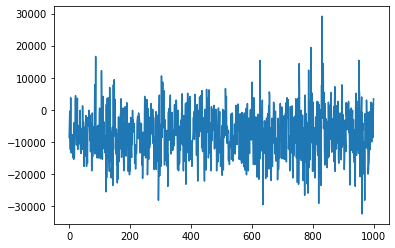

In [ ]:
tone = bearing3_file0.loc[:,4] # Just 1 channel

normalized_tone = np.int16((tone / tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

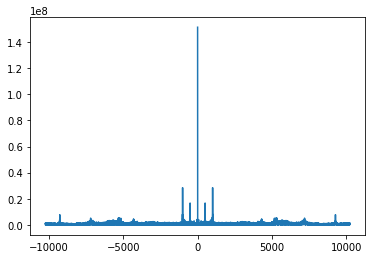

In [ ]:
from scipy.fft import fft, fftfreq

SAMPLE_RATE = 20480 # (...).shape[0]
DURATION = 1 # Just 1 file of 1 second




# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

## FFT preview for last files

In [ ]:
df, names = readFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/5archivosfinal')

In [ ]:
bearing3 = df.loc[:,4:5]
bearing3_last = bearing3.iloc[-20480:]

In [ ]:
bearing3_last

,4,5
0,-0.112,0.471
1,-0.510,0.005
2,0.037,-0.107
3,0.063,-0.205
4,-0.115,0.027
...,...,...
20475,-0.195,0.151
20476,-0.227,0.276
20477,-0.095,0.513
20478,-0.115,-0.012


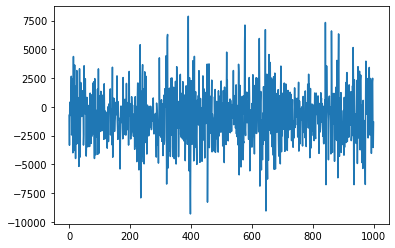

In [ ]:
tone = bearing3_last.loc[:,4] # Just 1 channel

normalized_tone = np.int16((tone / tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

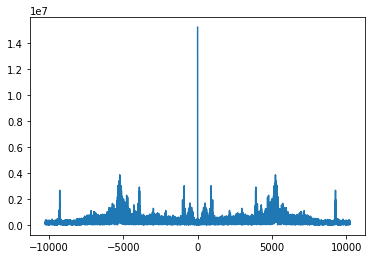

In [ ]:
SAMPLE_RATE = 20480 # (...).shape[0]
DURATION = 1 # Just 1 file of 1 second




# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

## Characteristics for FFT
Small test to compute characteristics in the frequency domain. They are in the complex numbers, and for their interpretation, they should be put in absolute terms.
Nonetheless, this will not be included in the proyect.

In [ ]:
df, names = readFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/10Archivos')
df = df.iloc[0:20480]

tone = df.loc[:,4] # Just 1 channel
normalized_tone = np.int16((tone / tone.max()) * 32767)

SAMPLE_RATE = 20480 # (...).shape[0]
DURATION = 1 # Just 1 file of 1 second

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

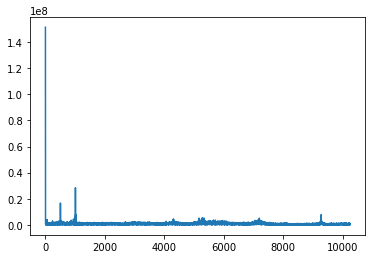

In [ ]:
plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
yf

array([-1.51296418e+08      +0.j        ,
       -1.29083580e+06 +390290.90411122j,
        2.75528338e+05+1541673.79490654j, ...,
       -7.53619931e+05 -198313.47051488j,
        5.17216133e+05 +251547.28188151j,
        1.51100000e+04      +0.j        ])

In [ ]:
xf

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.0238e+04, 1.0239e+04,
       1.0240e+04])

Yes, complex numbers, my favourites

In [ ]:
rms(yf)

(1475783.6584744467-32895.95199129747j)

In [ ]:
np.std(yf)

1842273.0398067578

In [ ]:
max(yf)

(11612740.40666751-26006715.57693314j)

In [ ]:
min(yf)

(-151296418+0j)

In [ ]:
np.mean(yf)

(-15986.221462747782+387.75663501900874j)

For the Amp Bin () we need a special formula

### testing the sample rate

In [ ]:
df, names = readFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/5archivosfinal')
df = df.iloc[0:20480]

tone = df.loc[:,4] # Just 1 channel
normalized_tone = np.int16((tone / tone.max()) * 32767)

SAMPLE_RATE = 20480 # (...).shape[0]
DURATION = 1 # Just 1 file of 1 second

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

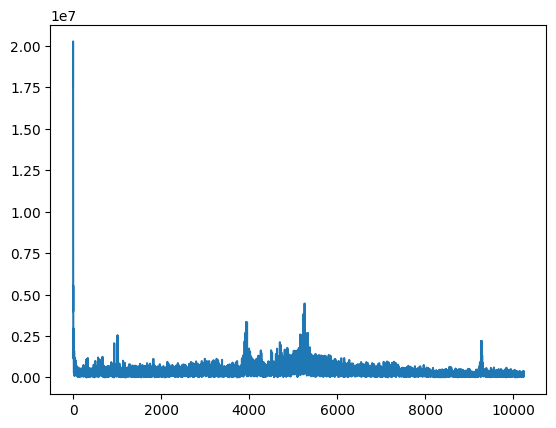

In [ ]:
plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
x = pd.DataFrame(xf)
y = pd.DataFrame(np.abs(yf))
y[y[0] > 0.23e+07]

,0
0,1.751872e+07
1,2.024846e+07
2,1.181447e+07
3,7.402675e+06
4,3.981408e+06
5,5.538116e+06
6,3.729754e+06
8,3.784287e+06
11,2.953352e+06
1011,2.549845e+06


In [ ]:
df, names = readFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/5archivosfinal')
df = df.iloc[0:20000]
tone = df.loc[:,4] # Just 1 channel
normalized_tone = np.int16((tone / tone.max()) * 32767)

SAMPLE_RATE = 20000 # (...).shape[0]
DURATION = 1 # Just 1 file of 1 second

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

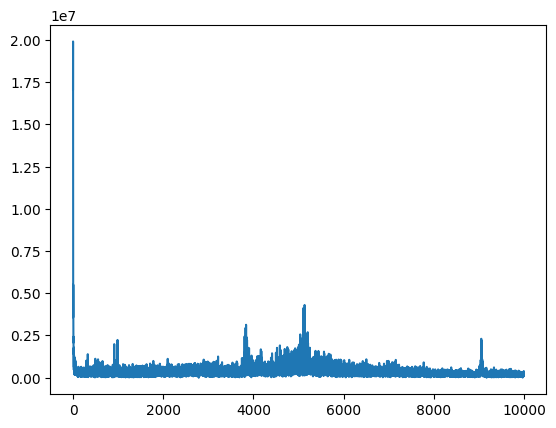

In [ ]:
plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
x = pd.DataFrame(xf)
y = pd.DataFrame(np.abs(yf))

In [ ]:
y[y[0] > 0.23e+07]

,0
0,1.708571e+07
1,1.990715e+07
2,1.209413e+07
3,7.187506e+06
4,3.556627e+06
5,5.501526e+06
6,3.757759e+06
8,3.376593e+06
11,2.419935e+06
3805,2.435778e+06


,0
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
9996,9996.0
9997,9997.0
9998,9998.0
9999,9999.0
